# RibbonFold - Clean Setup for Google Colab

This notebook provides a streamlined setup for running RibbonFold on Google Colab.

## Important Notes:
- This notebook is specifically designed for Google Colab
- Requires GPU runtime (T4 or better recommended)
- Update file paths in cells 8-9 to match your input data


In [1]:
#@title 1. Install conda and setup environment
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [2]:
#@title 2. Create Python 3.9 environment with CUDA 11.8 and upload please
import condacolab
from google.colab import files
import shutil
condacolab.check()
!mamba create -y -n ribbon_env python=3.9
!mamba install -y -n ribbon_env -c nvidia cudatoolkit=11.8

# Upload files
uploaded = files.upload()

# Loop through uploaded files and rename accordingly
for fname in uploaded.keys():
    if fname.lower().endswith((".fa", ".fasta")):
        shutil.move(fname, "/content/protein.fasta")
        print(f"{fname} saved as /content/protein.fasta")
    elif fname.lower().endswith((".a3m",)):
        shutil.move(fname, "/content/msa.a3m")
        print(f"{fname} saved as /content/msa.a3m")
    else:
        print(f"Skipping {fname} (not fasta or a3m)")

✨🍰✨ Everything looks OK!

Looking for: ['python=3.9']

[+] 0.0s
conda-forge/linux-64  ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch    20%[+] 0.3s
conda-forge/linux-64   7%
conda-forge/noarch    47%[+] 0.4s
conda-forge/linux-64  20%
conda-forge/noarch    59%[+] 0.5s
conda-forge/linux-64  33%
conda-forge/noarch    86%conda-forge/noarch                                
[+] 0.6s
conda-forge/linux-64  40%[+] 0.7s
conda-forge/linux-64  63%[+] 0.8s
conda-forge/linux-64  79%[+] 0.9s
conda-forge/linux-64  90%[+] 1.0s
conda-forge/linux-64  90%conda-forge/linux-64                              
Transaction

  Prefix: /usr/local/envs/ribbon_env

  Updating specs:

   - python=3.9


  Package              Version  Build               Channel           Size
────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────

  + ld_imp

Saving 5oqv.fasta to 5oqv.fasta
Saving fixed.a3m to fixed.a3m
5oqv.fasta saved as /content/protein.fasta
fixed.a3m saved as /content/msa.a3m


In [3]:
#@title 3. Install PyTorch 2.0.1 with CUDA 11.8
!conda run -n ribbon_env pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html

# Verify installation
!conda run -n ribbon_env python -c "import torch; print('PyTorch:', torch.__version__); print('CUDA available:', torch.cuda.is_available())"


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 19.4 MB/s  0:00:58
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 39.9 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 38.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 81.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 89.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 92.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 29.8 MB/s  0:00:00


PyTorch: 2.0.1+cu118
CUDA available: True



In [4]:
#@title 4. Install all required dependencies with compatible versions
# Install TensorFlow first with its required numpy version
!conda run -n ribbon_env pip install tensorflow-cpu==2.6.0 tensorflow-estimator==2.6.0

# Install remaining dependencies with compatible versions
!conda run -n ribbon_env pip install numpy==1.19.5 pandas==1.3.5 scipy==1.7.3 protobuf==3.19.6 torchtyping==0.1.4 functorch biopython dm-tree treelib tqdm ml_collections pytz python-dateutil contextlib2 PyYAML wrapt==1.12.1 gast==0.4.0 google-pasta==0.2.0 h5py==3.1.0 opt-einsum==3.3.0 termcolor==1.1.0 astunparse==1.6.3 flatbuffers==1.12 six==1.15.0 keras_preprocessing==1.1.2 keras_applications==1.0.8 absl-py==0.15.0


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 MB 1.6 MB/s  0:01:53
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 59.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 74.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 89.6 MB/s  0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30732 sha256=cb4be65e95f9b6593e8373ffa3339dcc6df568d6966400e2434fad8672330d16
  Stored in directory: /ro

In [5]:
#@title 5. Clone RibbonFold repository
!git clone https://github.com/thp42/RibbonFold.git ribbonfold


Cloning into 'ribbonfold'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 251 (delta 69), reused 196 (delta 41), pack-reused 0 (from 0)
Receiving objects: 100% (251/251), 615.93 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [6]:
#@title 6. Download and extract model checkpoints
!wget -O /content/model_checkpoints.tar.gz "https://zenodo.org/record/15128410/files/model_checkpoints.tar.gz?download=1"

# Extract model checkpoints with proper handling
!mkdir -p /content/ribbonfold/ckpt
!cd /content && tar -tzf model_checkpoints.tar.gz | head -5  # Check tar structure
!cd /content && tar -xzf model_checkpoints.tar.gz
!find /content -name "*.pt" -type f 2>/dev/null | head -5  # Find the extracted .pt files
!cp /content/model_ckpt_001.pt /content/ribbonfold/ckpt/ 2>/dev/null || find /content -name "model_ckpt_001.pt" -exec cp {} /content/ribbonfold/ckpt/ \;
!ls -la /content/ribbonfold/ckpt/  # Verify extraction


--2025-08-19 07:29:14--  https://zenodo.org/record/15128410/files/model_checkpoints.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15128410/files/model_checkpoints.tar.gz [following]
--2025-08-19 07:29:14--  https://zenodo.org/records/15128410/files/model_checkpoints.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1035632539 (988M) [application/octet-stream]
Saving to: ‘/content/model_checkpoints.tar.gz’

/content/model_chec 100%[===================>] 987.66M  2.04MB/s    in 11m 5s  

2025-08-19 07:40:20 (1.49 MB/s) - ‘/content/model_checkpoints.tar.gz’ saved [1035632539/1035632539]

model_ckpt_001.pt
/content/model_ckpt_001.pt
total 1097608
drwxr-xr-x 2 root root       4096 Aug 19 07:40 .
drwxr-xr-x 9 root root       

In [7]:
#@title 7. Setup Python path for AlphaFold modules
!conda run -n ribbon_env python -c "import site, pathlib; p=pathlib.Path(site.getsitepackages()[0])/'ribbonfold-af2.pth'; p.write_text('/content/ribbonfold/af2\\n'); print('Created path file:', p)"


Created path file: /usr/local/envs/ribbon_env/lib/python3.9/site-packages/ribbonfold-af2.pth



In [8]:
#@title 8. Process MSA file (Update paths as needed)
INPUT_FASTA = "/content/protein.fasta"     # Update this path
INPUT_A3M   = "/content/msa.a3m"   # Update this path
OUT_PKL     = "/content/output.pkl.gz"

!conda run -n ribbon_env python /content/ribbonfold/process_msa_file.py --input_fasta {INPUT_FASTA} --msa_file {INPUT_A3M} --output {OUT_PKL}


In [9]:
#@title 9. Run RibbonFold inference
%cd /content/ribbonfold

# Update these parameters as needed
CHECKPOINT_PATH = "./ckpt/model_ckpt_001.pt"
INPUT_PKL = "/content/output.pkl.gz"
RIBBON_NAME = "5oqv"
OUTPUT_DIR = "./results"
ROUNDS = 10

!conda run -n ribbon_env python inference.py --checkpoint {CHECKPOINT_PATH} --input_pkl {INPUT_PKL} --ribbon_name {RIBBON_NAME} --output_dir {OUTPUT_DIR} --rounds {ROUNDS} --use_dropout true --use_init_structure true


/content/ribbonfold
Checkpoint: ./ckpt/model_ckpt_001.pt
Input Ribbon data: /content/output.pkl.gz
Output Directory: ./results
Rounds: 10
Recycles: 5
MSA Random Sampling Mode: one_cluster
Use Dropout: True
Use Initial Structure: True
load model checkpoint success:  ./ckpt/model_ckpt_001.pt
run sample 0...
full sequence length:  720
monomer chain length:  144
number of chains:  5
num_recycle: 0
Mean of plddt: 38.759
Saved confidence data for recycle 0 to: ./results/model_ckpt_001_20250819_074101/5oqv_0_rec0_confidence.json
num_recycle: 1
Mean of plddt: 42.103
Saved confidence data for recycle 1 to: ./results/model_ckpt_001_20250819_074101/5oqv_0_rec1_confidence.json
num_recycle: 2
Mean of plddt: 44.298
Saved confidence data for recycle 2 to: ./results/model_ckpt_001_20250819_074101/5oqv_0_rec2_confidence.json
num_recycle: 3
Mean of plddt: 45.974
Saved confidence data for recycle 3 to: ./results/model_ckpt_001_20250819_074101/5oqv_0_rec3_confidence.json
num_recycle: 4
Mean of plddt: 47.4

In [10]:
#@title 10. View results
!ls -la /content/ribbonfold/results/
print("\nInference completed! Check the results directory for output PDB files.")


total 12
drwxr-xr-x  3 root root 4096 Aug 19 07:41 .
drwxr-xr-x 10 root root 4096 Aug 19 07:41 ..
drwxr-xr-x  2 root root 4096 Aug 19 09:41 model_ckpt_001_20250819_074101

Inference completed! Check the results directory for output PDB files.


In [11]:
#@title 11. Zip and download results
import os
from google.colab import files
import zipfile

# Create zip file with results
results_path = "/content/ribbonfold/results"
zip_filename = "/content/ribbonfold_results.zip"

if os.path.exists(results_path):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files_list in os.walk(results_path):
            for file in files_list:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, results_path)
                zipf.write(file_path, arcname)

    print(f"Results zipped to: {zip_filename}")
    print(f"Zip file size: {os.path.getsize(zip_filename) / (1024*1024):.2f} MB")

    # Download the zip file
    files.download(zip_filename)
    print("Download started! Check your browser's download folder.")
else:
    print("Results directory not found. Make sure inference completed successfully.")


Results zipped to: /content/ribbonfold_results.zip
Zip file size: 255.29 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started! Check your browser's download folder.


🎯 Interactive Model Viewer


Dropdown(description='Select Model:', index=2, layout=Layout(width='600px'), options=(('Rank #1: 5oqv_8.json (…


Generating plots for Rank #3...



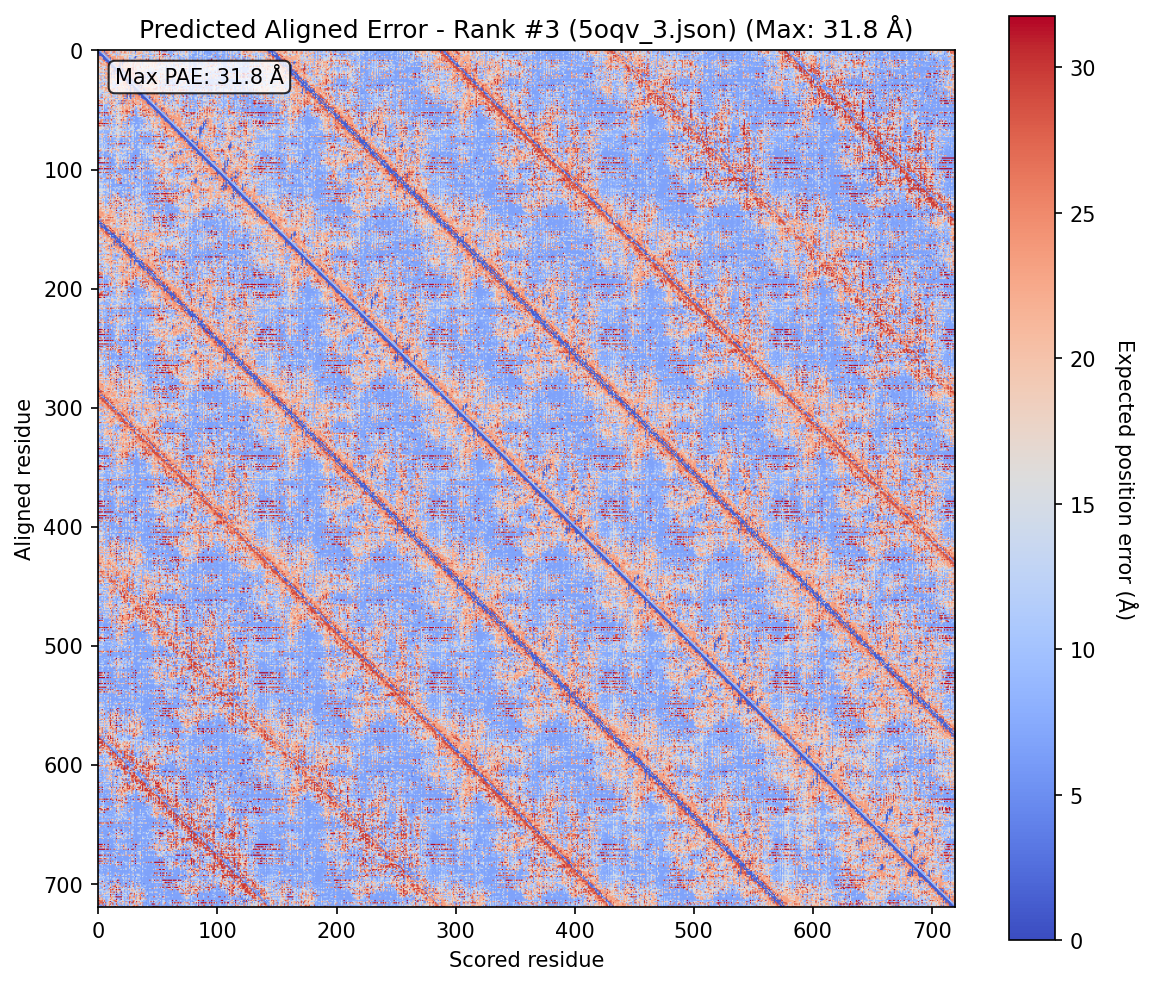
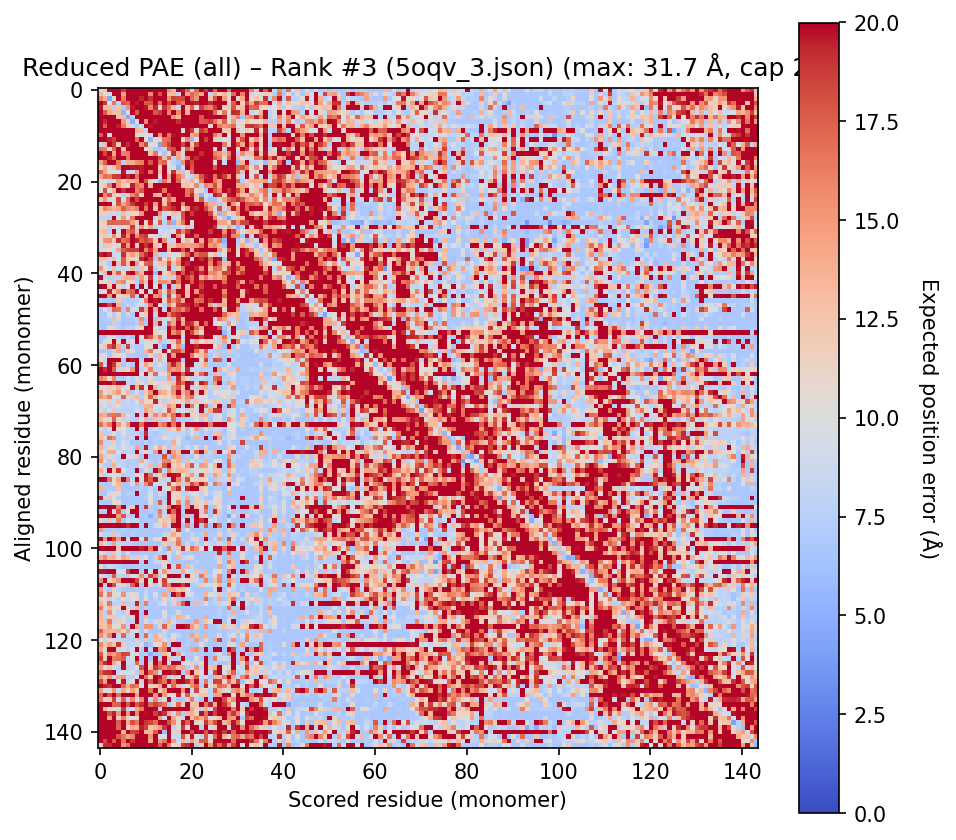
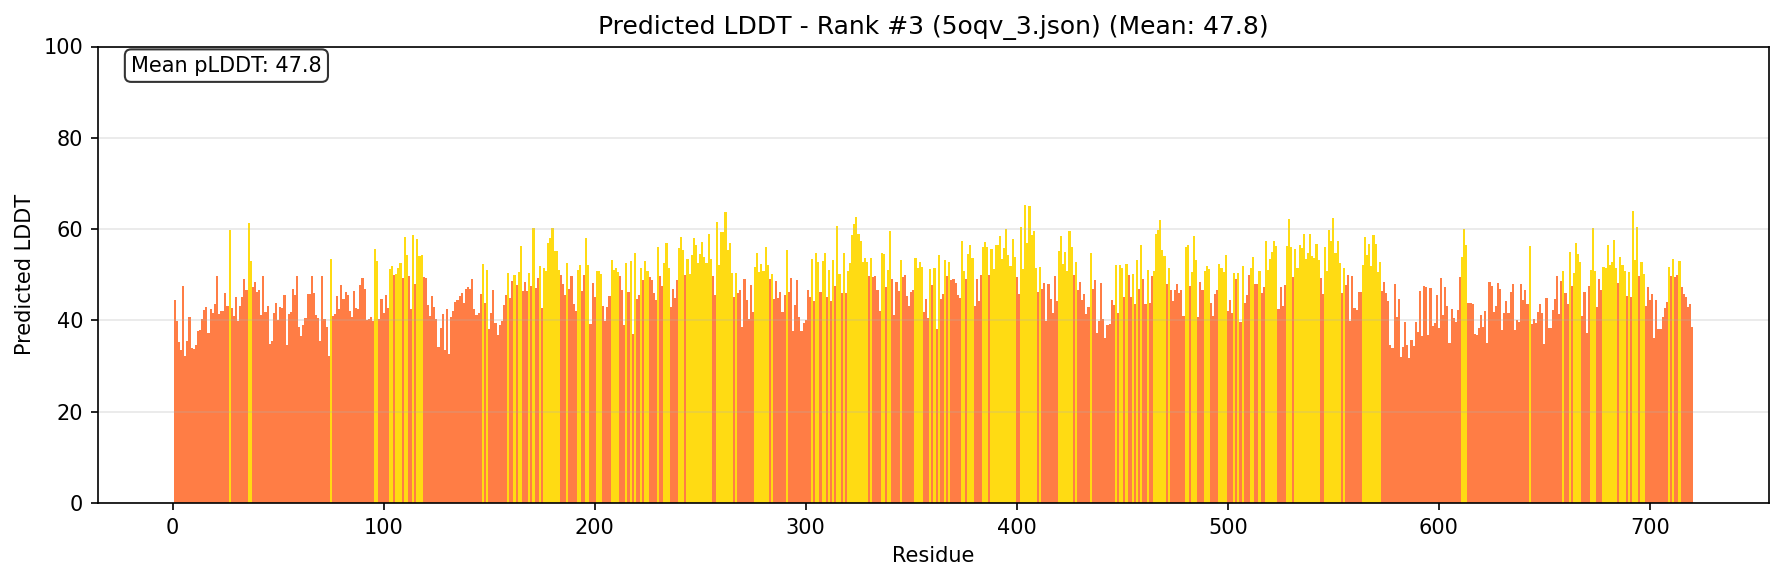
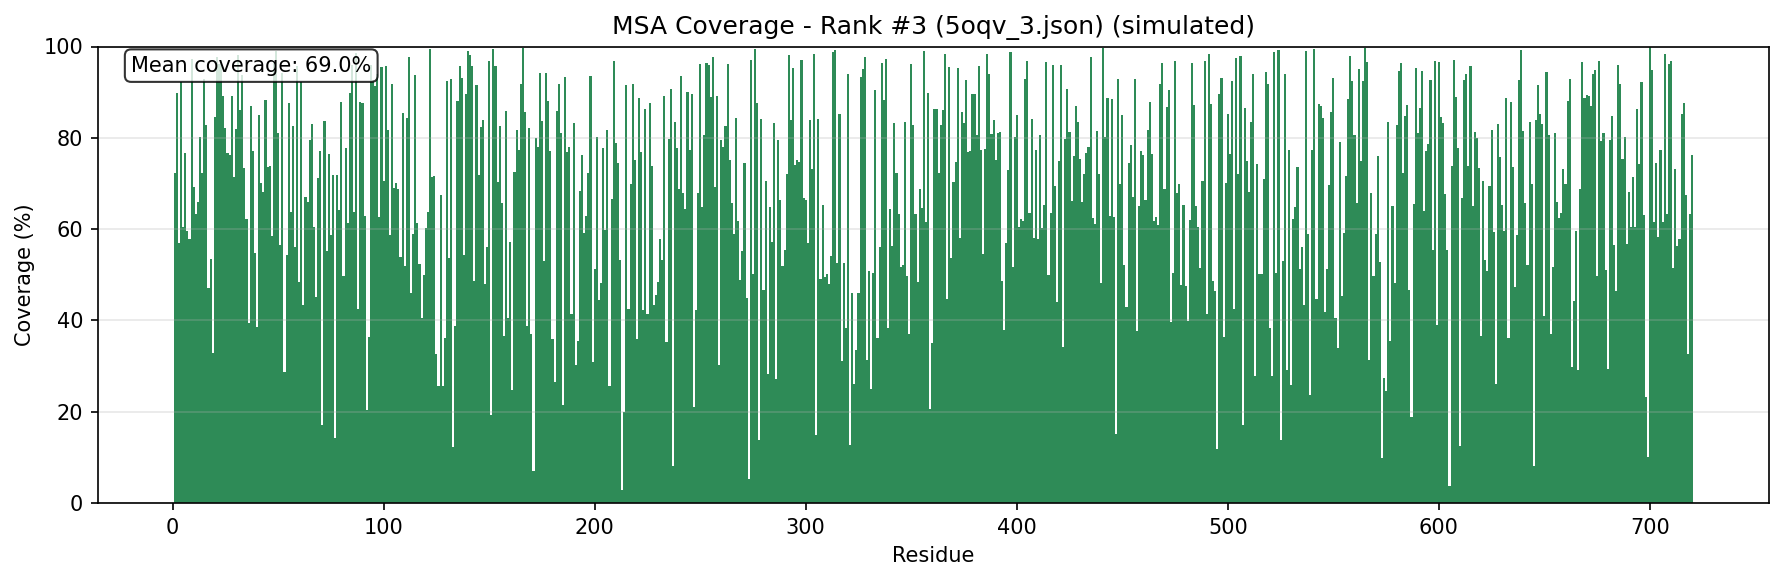

In [12]:
#@title 12. Interactive Confidence Plots - View All Models {run: "auto"}
import os
import sys
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML, clear_output
import base64
from html import escape
import ipywidgets as widgets
from IPython.display import display

# Configuration
RESULTS_DIR = "/content/ribbonfold/results"  # Update this path if needed

FASTA_PATH = "/content/protein.fasta"  # wherever your query fasta lives
REDUCE_PAE = True                      # set False to skip reduced PAE
REDUCE_MODE = "all"                 # "within" (intra-chain only) or "all" (intra+inter)
PAE_VMAX_CAP = 20.0                    # keeps color contrast informative

def read_fasta_lengths(fasta_path):
    """Return list of sequence lengths from a FASTA file."""
    lengths, seq = [], ""
    if not os.path.isfile(fasta_path):
        raise FileNotFoundError(f"FASTA not found: {fasta_path}")
    with open(fasta_path) as f:
        for line in f:
            if line.startswith(">"):
                if seq:
                    lengths.append(len(seq))
                    seq = ""
            else:
                seq += line.strip()
        if seq:
            lengths.append(len(seq))
    if not lengths:
        raise ValueError(f"No sequences found in FASTA: {fasta_path}")
    return lengths

def infer_chain_info(pae_matrix, fasta_path):
    """Infer monomer length and chain count from PAE size and FASTA sequence(s)."""
    N = len(pae_matrix)
    if N != len(pae_matrix[0]):
        raise ValueError("PAE matrix must be square.")
    lengths = read_fasta_lengths(fasta_path)
    if len(set(lengths)) != 1:
        raise ValueError(f"FASTA has different sequence lengths: {lengths}")
    chain_len = lengths[0]
    if N % chain_len != 0:
        raise ValueError(f"PAE size {N} not divisible by FASTA length {chain_len}.")
    n_chains = N // chain_len
    return chain_len, n_chains

def reduce_multimer_pae_to_monomer(pae_matrix, chain_len, n_chains, mode="within"):
    """
    Collapse (n_chains*chain_len) PAE -> (chain_len x chain_len).
    mode="within": average diagonal blocks (A–A, B–B, …).
    mode="all":    average all blocks (A–A, A–B, …, E–E).
    """
    pae = np.array(pae_matrix, dtype=float)
    blocks = [slice(i*chain_len, (i+1)*chain_len) for i in range(n_chains)]
    acc = np.zeros((chain_len, chain_len), float)
    if mode == "within":
        for k in range(n_chains):
            acc += pae[blocks[k], blocks[k]]
        acc /= n_chains
    elif mode == "all":
        for i in range(n_chains):
            for j in range(n_chains):
                acc += pae[blocks[i], blocks[j]]
        acc /= (n_chains*n_chains)
    else:
        raise ValueError("mode must be 'within' or 'all'")
    return acc

def plot_reduced_pae(pae_matrix, fasta_path, save_path, title_suffix="", mode="within", vmax_cap=20.0):
    """Infer chain info from FASTA, reduce to monomer PAE, and plot."""
    chain_len, n_chains = infer_chain_info(pae_matrix, fasta_path)
    reduced = reduce_multimer_pae_to_monomer(pae_matrix, chain_len, n_chains, mode=mode)

    plt.figure(figsize=(6.5, 6.5))
    vmax = min(np.max(reduced), vmax_cap)
    im = plt.imshow(reduced, cmap='coolwarm', vmin=0, vmax=vmax)
    cbar = plt.colorbar(im, shrink=0.85)
    cbar.set_label('Expected position error (Å)', rotation=270, labelpad=20)
    plt.xlabel('Scored residue (monomer)')
    plt.ylabel('Aligned residue (monomer)')
    plt.title(f"Reduced PAE ({mode}) – {title_suffix} (max: {np.max(reduced):.1f} Å, cap {vmax_cap:g})")
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    return save_path


def find_all_models(results_dir):
    """Find all models and rank them by mean pLDDT"""
    confidence_files = glob.glob(os.path.join(results_dir, "*confidence_*.json"))

    if not confidence_files:
        print("No confidence files found!")
        return []

    models = []

    for conf_file in confidence_files:
        try:
            with open(conf_file, 'r') as f:
                data = json.load(f)

            # Extract model info
            filename = os.path.basename(conf_file)
            mean_plddt = data.get('mean_plddt', 0)
            max_plddt = data.get('max_plddt', 0)
            min_plddt = data.get('min_plddt', 0)

            # Extract model identifier from filename
            model_id = filename.replace('_confidence.json', '').replace('_confidence_', '_')

            models.append({
                'id': model_id,
                'file': conf_file,
                'data': data,
                'mean_plddt': mean_plddt,
                'max_plddt': max_plddt,
                'min_plddt': min_plddt,
                'filename': filename
            })

        except Exception as e:
            print(f"Error reading {conf_file}: {e}")
            continue

    # Sort by mean pLDDT (descending)
    models.sort(key=lambda x: x['mean_plddt'], reverse=True)

    # Add rank information
    for i, model in enumerate(models):
        model['rank'] = i + 1

    return models

def plot_plddt(plddt_scores, save_path, title_suffix=""):
    """Plot pLDDT confidence scores"""
    plt.figure(figsize=(12, 4))
    residue_indices = list(range(1, len(plddt_scores) + 1))

    # Color mapping for confidence levels
    colors = []
    for score in plddt_scores:
        if score > 90:
            colors.append('#0053D6')  # Very high (blue)
        elif score > 70:
            colors.append('#65CBF3')  # Confident (light blue)
        elif score > 50:
            colors.append('#FFDB13')  # Low (yellow)
        else:
            colors.append('#FF7D45')  # Very low (orange)

    plt.bar(residue_indices, plddt_scores, color=colors, width=1.0)
    plt.xlabel('Residue')
    plt.ylabel('Predicted LDDT')
    plt.title(f'Predicted LDDT - {title_suffix} (Mean: {np.mean(plddt_scores):.1f})')
    plt.ylim(0, 100)
    plt.grid(True, alpha=0.3, axis='y')

    # Add mean pLDDT text
    mean_plddt = np.mean(plddt_scores)
    plt.text(0.02, 0.98, f'Mean pLDDT: {mean_plddt:.1f}',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    return save_path

def plot_pae(pae_matrix, save_path, title_suffix=""):
    """Plot PAE heatmap"""
    pae_array = np.array(pae_matrix)
    plt.figure(figsize=(8, 8))

    im = plt.imshow(pae_array, cmap='coolwarm', vmin=0, vmax=np.max(pae_array))
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label('Expected position error (Å)', rotation=270, labelpad=20)

    plt.xlabel('Scored residue')
    plt.ylabel('Aligned residue')
    plt.title(f'Predicted Aligned Error - {title_suffix} (Max: {np.max(pae_array):.1f} Å)')

    # Add max PAE text
    max_pae = np.max(pae_array)
    plt.text(0.02, 0.98, f'Max PAE: {max_pae:.1f} Å',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    return save_path

def plot_coverage_placeholder(num_residues, save_path, title_suffix=""):
    """Create placeholder coverage plot"""
    plt.figure(figsize=(12, 4))

    residue_indices = list(range(1, num_residues + 1))
    # Simulate coverage pattern (you could replace with actual MSA data)
    np.random.seed(42)  # For reproducible coverage pattern
    coverage = np.random.beta(2, 1, num_residues) * 100

    plt.bar(residue_indices, coverage, color='#2E8B57', width=1.0)
    plt.xlabel('Residue')
    plt.ylabel('Coverage (%)')
    plt.title(f'MSA Coverage - {title_suffix} (simulated)')
    plt.ylim(0, 100)
    plt.grid(True, alpha=0.3, axis='y')

    mean_coverage = np.mean(coverage)
    plt.text(0.02, 0.98, f'Mean coverage: {mean_coverage:.1f}%',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    return save_path

def plot_mean_pae_vector(pae_matrix, save_path, title_suffix=""):
    pae = np.array(pae_matrix, dtype=float)
    mean_vec = pae.mean(axis=0)  # (axis=1 is equivalent for symmetric PAE)

    # Optional: simple smoothing to see segments (window=11)
    win = 11 if len(mean_vec) >= 11 else max(1, len(mean_vec)//10*2+1)
    if win > 1:
        pad = win//2
        sm = np.convolve(np.pad(mean_vec, (pad,pad), mode='edge'),
                         np.ones(win)/win, mode='valid')
    else:
        sm = mean_vec

    plt.figure(figsize=(12, 3.6))
    x = np.arange(1, len(mean_vec)+1)
    plt.bar(x, mean_vec, width=1.0, alpha=0.55)
    plt.plot(x, sm, linewidth=1.5)
    plt.xlabel("Residue")
    plt.ylabel("Mean PAE (Å)")
    plt.title(f"Mean PAE per residue – {title_suffix} (global mean: {mean_vec.mean():.1f} Å)")
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()
    return save_path

def create_plots_for_model(model, results_dir):
    """Create plots for a specific model"""
    data = model['data']
    model_id = model['id']
    rank = model['rank']

    # Create title suffix with rank and pLDDT info
    title_suffix = f"Rank #{rank} ({model_id})"

    output_prefix = os.path.join(results_dir, f"rank_{rank}_{model_id}")

    plot_files = {}

    # Plot pLDDT
    if 'plddt' in data:
        plddt_file = f"{output_prefix}_plddt.png"
        plot_plddt(data['plddt'], plddt_file, title_suffix)
        plot_files['plddt'] = plddt_file

    # Plot PAE if available
    if 'pae' in data:
      pae_file = f"{output_prefix}_pae.png"
      plot_pae(data['pae'], pae_file, title_suffix)
      plot_files['pae'] = pae_file

      # NEW: reduced monomer PAE (no hardcoding of chain length)
      if REDUCE_PAE:
          pae_red_file = f"{output_prefix}_pae_reduced_{REDUCE_MODE}.png"
          try:
              plot_reduced_pae(data['pae'], FASTA_PATH, pae_red_file, title_suffix,
                                mode=REDUCE_MODE, vmax_cap=PAE_VMAX_CAP)
              plot_files['pae_reduced'] = pae_red_file
          except Exception as e:
              print(f"[Reduced PAE] skipped: {e}")


    # Create coverage placeholder
    if 'plddt' in data:
        coverage_file = f"{output_prefix}_coverage.png"
        plot_coverage_placeholder(len(data['plddt']), coverage_file, title_suffix)
        plot_files['coverage'] = coverage_file

    return plot_files

def image_to_data_url(filename):
    """Convert image to data URL for HTML display"""
    if not os.path.exists(filename):
        return ""
    ext = filename.split('.')[-1]
    prefix = f'data:image/{ext};base64,'
    with open(filename, 'rb') as f:
        img = f.read()
    return prefix + base64.b64encode(img).decode('utf-8')

def display_model_plots(model, plot_files, results_dir):
    """Display plots for the selected model"""
    rank = model['rank']
    model_id = model['id']
    data = model['data']

    # Get job name from results directory
    jobname = os.path.basename(results_dir.rstrip('/'))

    # Prepare image data URLs
    pae = ""
    plddt = ""
    coverage = ""
    pae_reduced = ""

    if 'pae' in plot_files and os.path.isfile(plot_files['pae']):
        pae = image_to_data_url(plot_files['pae'])

    if 'plddt' in plot_files and os.path.isfile(plot_files['plddt']):
        plddt = image_to_data_url(plot_files['plddt'])

    if 'coverage' in plot_files and os.path.isfile(plot_files['coverage']):
        coverage = image_to_data_url(plot_files['coverage'])

    if 'pae_reduced' in plot_files and os.path.isfile(plot_files['pae_reduced']):
        pae_reduced = image_to_data_url(plot_files['pae_reduced'])

    # Create model statistics
    stats_html = f"""
    <div style="background-color: #f0f0f0; padding: 15px; margin: 10px 0; border-radius: 5px;">
        <h3>Model Statistics - Rank #{rank}</h3>
        <div style="display: flex; flex-wrap: wrap; gap: 20px;">
            <div><strong>Model ID:</strong> {model_id}</div>
            <div><strong>Mean pLDDT:</strong> {data.get('mean_plddt', 0):.2f}</div>
            <div><strong>Max pLDDT:</strong> {data.get('max_plddt', 0):.2f}</div>
            <div><strong>Min pLDDT:</strong> {data.get('min_plddt', 0):.2f}</div>
            { '<div><strong>Max PAE:</strong> ' + f"{data.get('max_pae', 0):.2f} Å</div>" if 'max_pae' in data else '' }
        </div>
    </div>
    """

    # Display the plots using HTML
    display(HTML(f"""
    <style>
      img {{
        float:left;
        margin: 10px;
      }}
      .full {{
        max-width:90%;
        clear: both;
      }}
      .half {{
        max-width:45%;
      }}
      @media (max-width:640px) {{
        .half {{
          max-width:100%;
        }}
      }}
      .plot-container {{
        margin-bottom: 20px;
        overflow: hidden;
      }}
    </style>
    <div style="max-width:95%; padding:2em;">
      <h1>Confidence Plots for {escape(jobname)} - Rank #{rank}</h1>
      {stats_html}
      <div class="plot-container">
        { '<!--' if pae == '' else '' }<img src="{pae}" class="full" alt="PAE Plot" />{ '-->' if pae == '' else '' }
      </div>
      <div class="plot-container">
        { '<!--' if pae_reduced == '' else '' }<img src="{pae_reduced}" class="full" alt="Reduced monomer PAE" />{ '-->' if pae_reduced == '' else '' }
      </div>
      <div class="plot-container">
        <img src="{plddt}" class="half" alt="pLDDT Plot" />
        <img src="{coverage}" class="half" alt="Coverage Plot" />
      </div>
      <div style="clear: both; margin-top: 20px;">
        <p><strong>Plot descriptions:</strong></p>
        <ul>
          <li><strong>pLDDT Plot:</strong> Per-residue confidence scores (0-100). Higher scores indicate more reliable predictions.</li>
          { '<li><strong>PAE Plot:</strong> Predicted Aligned Error between residue pairs. Lower values (darker) indicate more confident relative positions.</li>' if pae != '' else '' }
          <li><strong>Coverage Plot:</strong> MSA coverage information (placeholder - shows estimated coverage pattern).</li>
        </ul>
      </div>
    </div>
    """))

# Global variables for widget interaction
current_models = []
current_results_dir = ""

def on_model_change(change):
    """Handle model selection change"""
    global current_models, current_results_dir

    if not current_models:
        return

    selected_rank = change['new']
    selected_model = None

    for model in current_models:
        if model['rank'] == selected_rank:
            selected_model = model
            break

    if selected_model:
        # Clear previous output
        clear_output(wait=True)

        # Recreate the dropdown
        model_options = [(f"Rank #{model['rank']}: {model['id']} (pLDDT: {model['mean_plddt']:.2f})",
                         model['rank']) for model in current_models]

        dropdown = widgets.Dropdown(
            options=model_options,
            value=selected_rank,
            description='Select Model:',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='600px')
        )
        dropdown.observe(on_model_change, names='value')

        print("🎯 Interactive Model Viewer")
        print("=" * 50)
        display(dropdown)

        # Create and display plots for selected model
        print(f"\nGenerating plots for Rank #{selected_model['rank']}...")
        plot_files = create_plots_for_model(selected_model, current_results_dir)
        display_model_plots(selected_model, plot_files, current_results_dir)

# Main execution
print("🔍 Searching for models...")
print(f"Looking for results in: {RESULTS_DIR}")

# Find the most recent results directory (if multiple exist)
if os.path.exists(RESULTS_DIR):
    result_subdirs = [d for d in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, d))]
    if result_subdirs:
        # Use the most recent directory
        result_subdirs.sort()
        actual_results_dir = os.path.join(RESULTS_DIR, result_subdirs[-1])
    else:
        actual_results_dir = RESULTS_DIR
else:
    actual_results_dir = RESULTS_DIR

current_results_dir = actual_results_dir
print(f"Using results directory: {actual_results_dir}")

# Check if results directory exists
if not os.path.exists(actual_results_dir):
    print(f"❌ Results directory not found: {actual_results_dir}")
    print("Make sure inference has completed successfully.")
else:
    # Find and rank all models
    try:
        models = find_all_models(actual_results_dir)
        current_models = models

        if models:
            print(f"✅ Found {len(models)} models")
            print("\n📊 Model Rankings:")
            print("-" * 60)
            for model in models:
                print(f"Rank #{model['rank']}: {model['id']} - pLDDT: {model['mean_plddt']:.2f}")

            # Create dropdown widget with all models
            model_options = [(f"Rank #{model['rank']}: {model['id']} (pLDDT: {model['mean_plddt']:.2f})",
                             model['rank']) for model in models]

            dropdown = widgets.Dropdown(
                options=model_options,
                value=1,  # Start with best model (rank 1)
                description='Select Model:',
                style={'description_width': 'initial'},
                layout=widgets.Layout(width='600px')
            )

            dropdown.observe(on_model_change, names='value')

            print("\n🎯 Interactive Model Viewer")
            print("=" * 50)
            print("Use the dropdown below to switch between models:")
            display(dropdown)

            # Display best model initially
            best_model = models[0]  # First in sorted list
            print(f"\nShowing best model: Rank #{best_model['rank']} (pLDDT: {best_model['mean_plddt']:.2f})")

            plot_files = create_plots_for_model(best_model, actual_results_dir)
            display_model_plots(best_model, plot_files, actual_results_dir)

        else:
            print("❌ No confidence data found.")
            print("Make sure the inference completed successfully and confidence JSON files exist.")

    except Exception as e:
        print(f"❌ Error processing models: {e}")
        import traceback
        traceback.print_exc()
